In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install pandas
!pip install numpy
!pip install os
!pip install cv2
!pip install matplotlib
!pip install tensorflow
# !pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 


In [4]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='/content/gdrive/MyDrive/Alzheimers-ADNI/train',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='/content/gdrive/MyDrive/Alzheimers-ADNI/train',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="validation",
                                                 class_mode='categorical')

image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='/content/gdrive/MyDrive/Alzheimers-ADNI/test',
                                                 shuffle=False,
                                                 target_size=(176,208), 
                                                 class_mode=None)

Found 899 images belonging to 5 classes.
Found 222 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


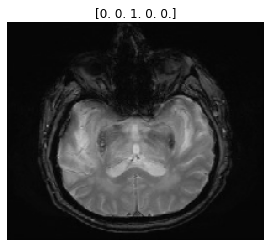

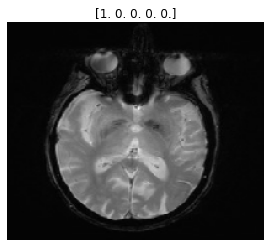

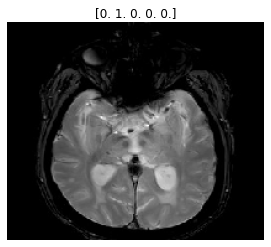

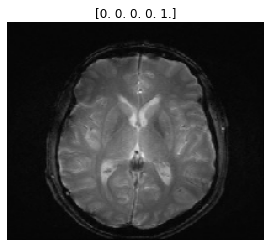

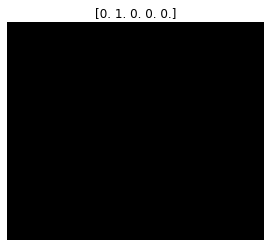

In [5]:
batch_1_img = train_dataset[0]
for i in range(0,5):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()


In [6]:
vgg = VGG16(input_shape=(176,208,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(5, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 176, 208, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 176, 208, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 88, 104, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 88, 104, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 88, 104, 128)      147584    
                                                              

In [7]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [8]:
modelvgg.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)
# vgg_history = modelvgg.fit(train_dataset,
#                             # batch_size=BATCH_SIZE,
#                             epochs=50,
#                             validation_data=validation_dataset,
#                             # steps_per_epoch=n_steps,
#                             # validation_steps=n_val_steps,
#                             callbacks=callback,
#                             verbose=1)

Epoch 1/50
113/113 [==============================] - 506s 4s/step - loss: 1.6985 - auc: 0.6915 - val_loss: 1.4658 - val_auc: 0.7266
Epoch 2/50
113/113 [==============================] - 503s 4s/step - loss: 1.2992 - auc: 0.7922 - val_loss: 1.4956 - val_auc: 0.7231
Epoch 3/50
113/113 [==============================] - 501s 4s/step - loss: 1.1139 - auc: 0.8420 - val_loss: 1.7637 - val_auc: 0.6525
Epoch 4/50
113/113 [==============================] - 449s 4s/step - loss: 0.8707 - auc: 0.9053 - val_loss: 1.5658 - val_auc: 0.7128
Epoch 5/50
113/113 [==============================] - 500s 4s/step - loss: 0.7509 - auc: 0.9336 - val_loss: 1.6593 - val_auc: 0.7249
Epoch 6/50
113/113 [==============================] - 449s 4s/step - loss: 0.6714 - auc: 0.9479 - val_loss: 1.7622 - val_auc: 0.6714
Epoch 7/50
113/113 [==============================] - 446s 4s/step - loss: 0.6078 - auc: 0.9590 - val_loss: 1.5994 - val_auc: 0.7085
Epoch 8/50
113/113 [==============================] - 503s 4s/step - 

In [9]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

28/28 [==============================] - 99s 3s/step - loss: 1.4658 - auc: 0.7266
Loss:  1.465767502784729
Accuracy:  0.7266024351119995
